# LENET ARCHITECTURE

In [1]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

2.12.0


In [2]:
# Create an ImageDataGenerator for data augmentation and preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

In [3]:
# Define the path to your dataset directory
dataset_dir = 'Dataset'

# Set the batch size and number of classes
batch_size = 64
num_classes = 9

In [4]:
# Load and preprocess the dataset using the ImageDataGenerator

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 1072 images belonging to 9 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 264 images belonging to 9 classes.


In [6]:
from tensorflow.keras.models import Sequential

MODEL = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')])

OPT    = tensorflow.keras.optimizers.Adam(0.001)

MODEL.compile(optimizer=OPT,loss='categorical_crossentropy',metrics=["accuracy", tensorflow.keras.metrics.Precision()])
MODEL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [7]:
model_path = "LENET.h5"

from keras.callbacks import ModelCheckpoint
M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [8]:
epochs = 50

In [9]:
history = MODEL.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[M]  # Add the callbacks here
)

Epoch 1/50
17/17 [==============================] - ETA: 0s - loss: 3.4054 - accuracy: 0.2425 - precision: 0.2390
Epoch 1: accuracy improved from -inf to 0.24254, saving model to LENET.h5
17/17 [==============================] - 65s 4s/step - loss: 3.4054 - accuracy: 0.2425 - precision: 0.2390 - val_loss: 1.9255 - val_accuracy: 0.1894 - val_precision: 0.0000e+00
Epoch 2/50
17/17 [==============================] - ETA: 0s - loss: 1.9039 - accuracy: 0.2752 - precision: 0.3939
Epoch 2: accuracy improved from 0.24254 to 0.27519, saving model to LENET.h5
17/17 [==============================] - 61s 4s/step - loss: 1.9039 - accuracy: 0.2752 - precision: 0.3939 - val_loss: 1.7955 - val_accuracy: 0.3333 - val_precision: 0.0000e+00
Epoch 3/50
17/17 [==============================] - ETA: 0s - loss: 1.7435 - accuracy: 0.3713 - precision: 0.6136
Epoch 3: accuracy improved from 0.27519 to 0.37127, saving model to LENET.h5
17/17 [==============================] - 57s 3s/step - loss: 1.7435 - accura

17/17 [==============================] - ETA: 0s - loss: 0.8640 - accuracy: 0.7034 - precision: 0.8036
Epoch 24: accuracy improved from 0.68937 to 0.70336, saving model to LENET.h5
17/17 [==============================] - 54s 3s/step - loss: 0.8640 - accuracy: 0.7034 - precision: 0.8036 - val_loss: 1.8050 - val_accuracy: 0.5227 - val_precision: 0.5708
Epoch 25/50
17/17 [==============================] - ETA: 0s - loss: 0.8674 - accuracy: 0.6810 - precision: 0.7929
Epoch 25: accuracy did not improve from 0.70336
17/17 [==============================] - 57s 3s/step - loss: 0.8674 - accuracy: 0.6810 - precision: 0.7929 - val_loss: 1.8885 - val_accuracy: 0.5000 - val_precision: 0.5444
Epoch 26/50
17/17 [==============================] - ETA: 0s - loss: 0.8568 - accuracy: 0.7090 - precision: 0.8036
Epoch 26: accuracy improved from 0.70336 to 0.70896, saving model to LENET.h5
17/17 [==============================] - 57s 3s/step - loss: 0.8568 - accuracy: 0.7090 - precision: 0.8036 - val_loss

Epoch 48/50
17/17 [==============================] - ETA: 0s - loss: 0.7020 - accuracy: 0.7463 - precision: 0.8275
Epoch 48: accuracy did not improve from 0.75840
17/17 [==============================] - 56s 3s/step - loss: 0.7020 - accuracy: 0.7463 - precision: 0.8275 - val_loss: 2.2361 - val_accuracy: 0.5606 - val_precision: 0.6119
Epoch 49/50
17/17 [==============================] - ETA: 0s - loss: 0.7417 - accuracy: 0.7369 - precision: 0.8072
Epoch 49: accuracy did not improve from 0.75840
17/17 [==============================] - 55s 3s/step - loss: 0.7417 - accuracy: 0.7369 - precision: 0.8072 - val_loss: 2.3344 - val_accuracy: 0.4848 - val_precision: 0.5185
Epoch 50/50
17/17 [==============================] - ETA: 0s - loss: 0.7707 - accuracy: 0.7295 - precision: 0.8242
Epoch 50: accuracy did not improve from 0.75840
17/17 [==============================] - 55s 3s/step - loss: 0.7707 - accuracy: 0.7295 - precision: 0.8242 - val_loss: 2.4749 - val_accuracy: 0.5265 - val_precision:

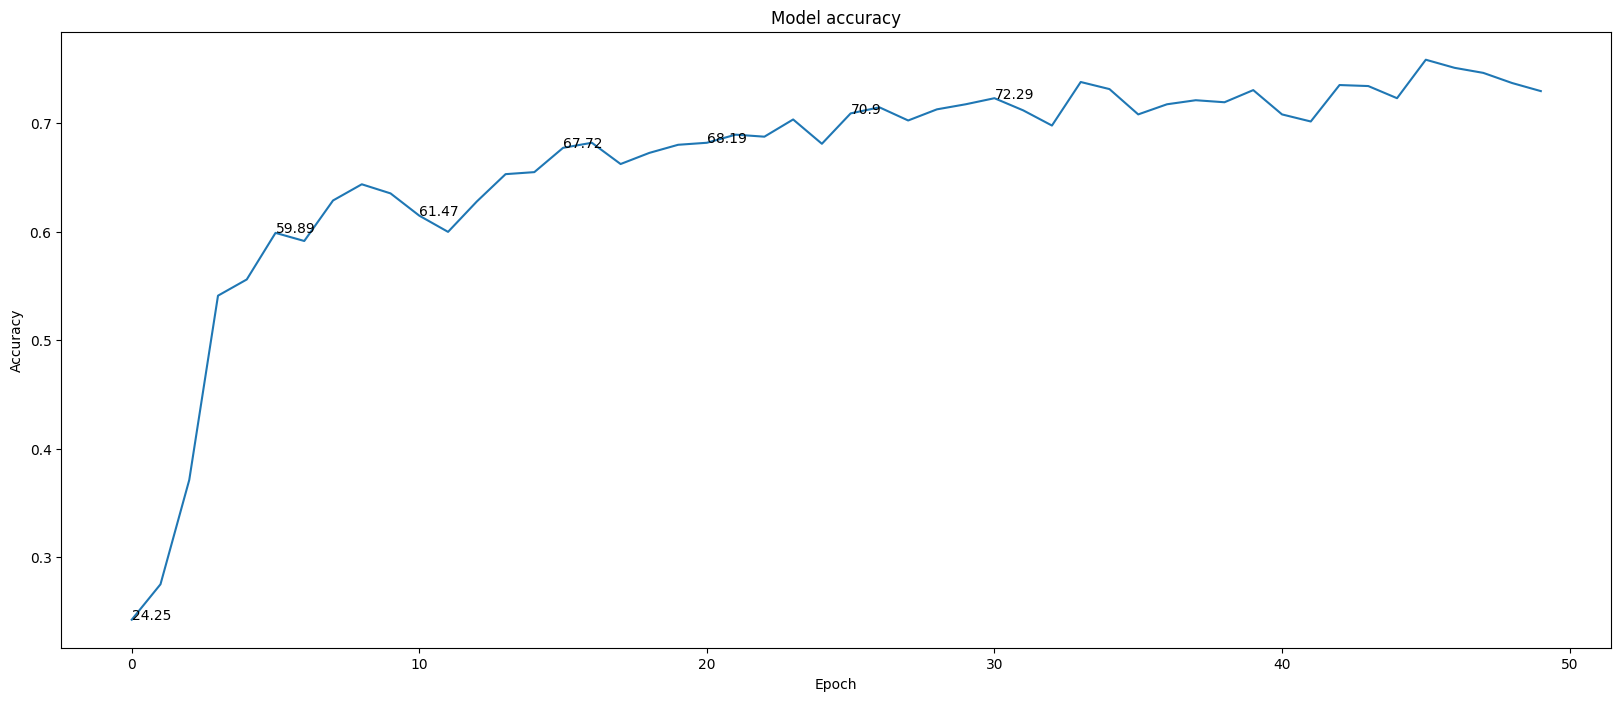

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(34):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

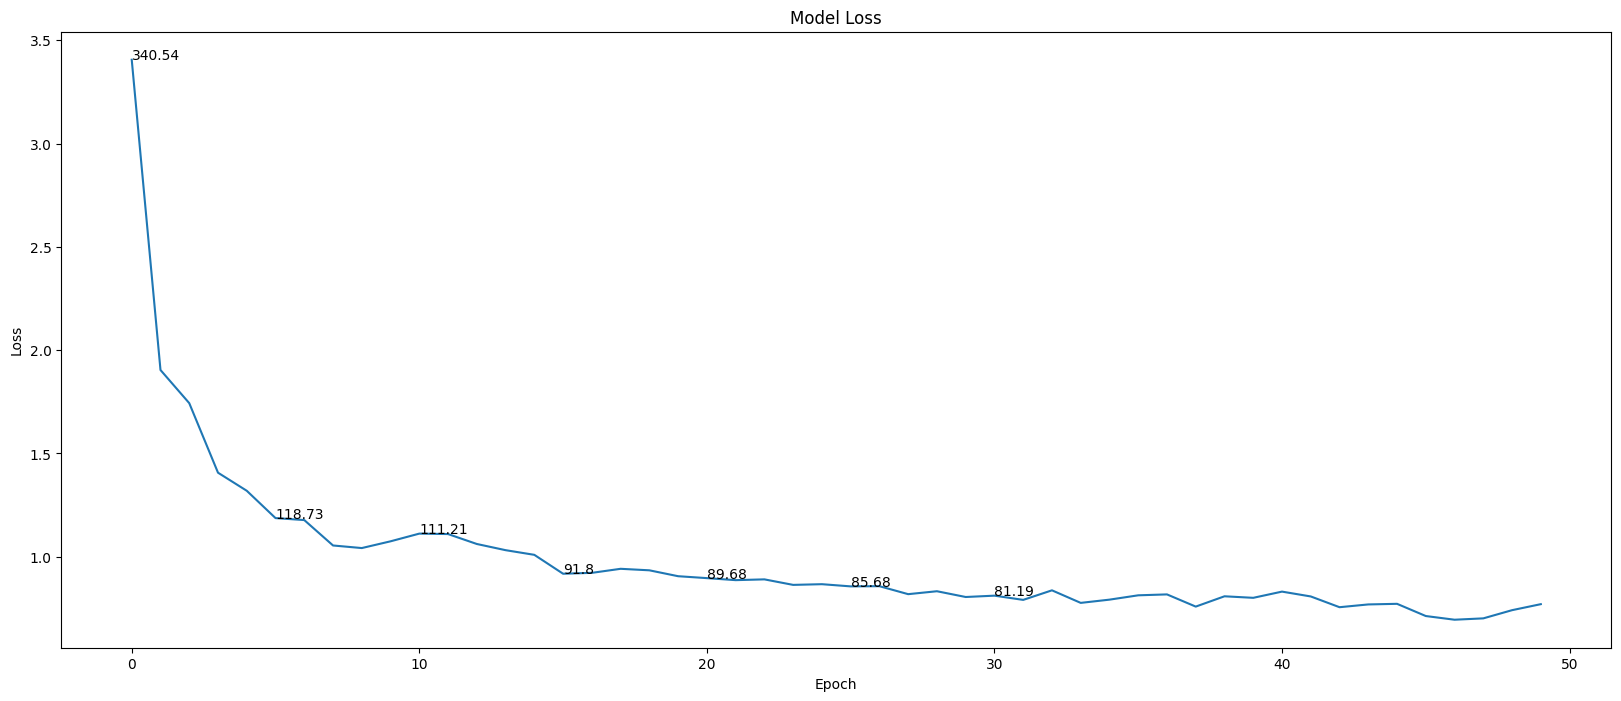

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(34):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()